In [ ]:
import pandas as pd
import numpy as np

# Create a large dataframe
letters = pd.Series(list('ABCD'))
df = pd.DataFrame(data=np.random.randn(10**7, 10), 
                  columns=[letters.sample(1).iloc[0] + str(i).zfill(2) for i in range(10)])

# Create a couple of categorical columns
df.iloc[:, 0] = pd.cut(df.iloc[:, 0], 6, labels=['EN', 'RU', 'PO', 'AR', 'FR', 'ES'])
df.iloc[:, 1] = pd.cut(df.iloc[:, 1], 4, labels=['Ignore', 'Alert', 'Critical', 'Shutdown'])

# Significant digits reduction
df = df.applymap(lambda x: round(x, 2) if type(x) != str else x)

# Save as csv to test with tools
df.to_csv('../data/raw/fromPandas.csv', index=False)
df.head()

---

# **`csvtk`**

- A cross-platform, efficient, practical and pretty CSV/TSV toolkit in Golang
- [docs](http://bioinf.shenwei.me/csvtk/)
- [Usage](http://bioinf.shenwei.me/csvtk/usage/)
- [Tutorial](http://bioinf.shenwei.me/csvtk/tutorial/)

---

In [1]:
!csvtk

A cross-platform, efficient and practical CSV/TSV toolkit

Version: 0.7.1

Author: Wei Shen <shenwei356@gmail.com>

Documents  : http://shenwei356.github.io/csvtk
Source code: https://github.com/shenwei356/csvtk

Attention:

    1. The CSV parser requires all the lines have same number of fields/columns.
       Even lines with spaces will cause error.
    2. By default, csvtk thinks your files have header row, if not, switch flag "-H" on.
    3. Column names better be unique.
    4. By default, lines starting with "#" will be ignored, if the header row
       starts with "#", please assign flag "-C" another rare symbol, e.g. '$'.
    5. By default, csvtk handles CSV files, use flag "-t" for tab-delimited files.
    6. If " exists in tab-delimited files, use flag "-l".

Usage:
  csvtk [command]

Available Commands:
  csv2md      convert CSV to markdown format
  csv2tab     convert CSV to tabular format
  cut         select parts of fields
  filter      filter rows by values of selected 

## `headers`

In [96]:
!csvtk headers ../data/raw/fromPandas.csv

# ../data/raw/fromPandas.csv
1	C00
2	D01
3	C02
4	D03
5	D04
6	A05
7	A06
8	B07
9	A08
10	C09


## `head`

In [97]:
!csvtk head -n 5 ../data/raw/fromPandas.csv

C00,D01,C02,D03,D04,A05,A06,B07,A08,C09
PO,Alert,0.08,-0.29,1.04,0.5,-0.19,0.92,-1.18,0.46
PO,Alert,0.86,1.81,2.28,1.58,0.79,1.19,0.99,-1.17
PO,Critical,-0.04,0.52,-0.52,0.34,2.09,-0.6,0.85,-1.14
AR,Critical,-0.28,0.56,0.69,0.62,-0.28,-0.25,0.64,-2.03
AR,Critical,0.04,-0.38,-0.66,-1.76,-0.13,0.6,-2.06,0.96


## `pretty`

In [2]:
!csvtk pretty -h

convert CSV to readable aligned table

Attention:

    pretty treats the first row as header line and requires them to be unique

Usage:
  csvtk pretty [flags]

Flags:
  -r, --align-right        align right
  -W, --max-width int      max width
  -w, --min-width int      min width
  -s, --separator string   fields/columns separator (default "   ")

Global Flags:
  -c, --chunk-size int         chunk size of CSV reader (default 50)
  -C, --comment-char string    lines starting with commment-character will be ignored. if your header row starts with '#', please assign "-C" another rare symbol, e.g. '$' (default "#")
  -d, --delimiter string       delimiting character of the input CSV file (default ",")
  -l, --lazy-quotes            if given, a quote may appear in an unquoted field and a non-doubled quote may appear in a quoted field
  -H, --no-header-row          specifies that the input CSV file does not have header row
  -j, --num-cpus int           number of CPUs to use (default value d

In [98]:
!csvtk head ../data/raw/fromPandas.csv | csvtk pretty -r

C00        D01     C02     D03     D04     A05     A06     B07     A08     C09
 PO      Alert    0.08   -0.29    1.04     0.5   -0.19    0.92   -1.18    0.46
 PO      Alert    0.86    1.81    2.28    1.58    0.79    1.19    0.99   -1.17
 PO   Critical   -0.04    0.52   -0.52    0.34    2.09    -0.6    0.85   -1.14
 AR   Critical   -0.28    0.56    0.69    0.62   -0.28   -0.25    0.64   -2.03
 AR   Critical    0.04   -0.38   -0.66   -1.76   -0.13     0.6   -2.06    0.96
 PO   Critical    0.77    1.48    0.16   -0.59    0.94    0.48   -0.32   -0.55
 AR      Alert   -0.15    0.03   -2.05   -0.56   -1.04    1.29    0.51   -0.01
 PO      Alert   -0.17    -0.4   -0.16    2.65   -0.48    0.25    -1.1    0.77
 AR      Alert   -0.57   -0.31   -0.14   -2.89    0.52    0.18   -0.03    0.47
 AR   Critical   -1.09   -0.21    0.65     0.7    0.43   -0.46    0.72   -0.24


## `sample`

- the `-H` switch removes the header, `-p` specifies proportion

In [99]:
!csvtk sample -H -p 0.01 ../data/raw/fromPandas.csv | wc -l

99729


In [100]:
!csvtk sample -p 0.001 ../data/raw/fromPandas.csv | head

C00,D01,C02,D03,D04,A05,A06,B07,A08,C09
AR,Critical,-1.07,-0.36,-0.02,-2.35,1.23,-0.11,1.46,-1.51
PO,Alert,-0.73,-0.19,0.62,-0.03,0.63,-0.1,0.78,0.39
AR,Critical,-0.49,-0.64,-0.2,-0.13,-0.03,-1.08,-0.38,-0.35
AR,Alert,-0.92,-1.34,-0.3,-0.08,0.36,-0.44,-0.23,0.13
AR,Critical,-0.44,0.47,1.2,-1.76,-0.76,-0.35,0.93,-0.15
FR,Alert,-0.54,-0.22,-1.45,0.93,0.11,-0.52,0.25,-1.61
AR,Critical,-0.63,1.32,0.75,0.25,0.3,-0.39,-0.33,-1.29
PO,Alert,1.0,-0.1,1.27,1.66,-0.17,-0.65,1.41,-0.7
RU,Alert,-0.64,-0.62,0.12,0.36,-0.35,0.89,-0.32,-0.83


## `stats` 

In [101]:
!csvtk stats ../data/raw/fromPandas.csv

file                         num_cols     num_rows
../data/raw/fromPandas.csv         10   10,000,000


## `cut`

In [102]:
!csvtk cut -h

select parts of fields

Usage:
  csvtk cut [flags]

Flags:
  -f, --fields string   select only these fields. e.g -f 1,2 or -f columnA,columnB, or -f -columnA for unselect columnA
  -F, --fuzzy-fields    using fuzzy fields, e.g. -f "*name" or "id123*"

Global Flags:
  -c, --chunk-size int         chunk size of CSV reader (default 50)
  -C, --comment-char string    lines starting with commment-character will be ignored. if your header row starts with '#', please assign "-C" another rare symbol, e.g. '$' (default "#")
  -d, --delimiter string       delimiting character of the input CSV file (default ",")
  -l, --lazy-quotes            if given, a quote may appear in an unquoted field and a non-doubled quote may appear in a quoted field
  -H, --no-header-row          specifies that the input CSV file does not have header row
  -j, --num-cpus int           number of CPUs to use (default value depends on your computer) (default 8)
  -D, --out-delimiter string   delimiting character of the ou

In [103]:
# by position, ranges
!head ../data/raw/fromPandas.csv | csvtk cut -f 2,3,5-7 | csvtk pretty -r

     D01     C02     D04     A05     A06
   Alert    0.08    1.04     0.5   -0.19
   Alert    0.86    2.28    1.58    0.79
Critical   -0.04   -0.52    0.34    2.09
Critical   -0.28    0.69    0.62   -0.28
Critical    0.04   -0.66   -1.76   -0.13
Critical    0.77    0.16   -0.59    0.94
   Alert   -0.15   -2.05   -0.56   -1.04
   Alert   -0.17   -0.16    2.65   -0.48
   Alert   -0.57   -0.14   -2.89    0.52


In [104]:
# by exact name
!head ../data/raw/fromPandas.csv | csvtk cut -f A05,B07,C00,D04 | csvtk pretty -r

  A05     B07   C00     D04
  0.5    0.92    PO    1.04
 1.58    1.19    PO    2.28
 0.34    -0.6    PO   -0.52
 0.62   -0.25    AR    0.69
-1.76     0.6    AR   -0.66
-0.59    0.48    PO    0.16
-0.56    1.29    AR   -2.05
 2.65    0.25    PO   -0.16
-2.89    0.18    AR   -0.14


In [105]:
# by fuzzy matching
!head ../data/raw/fromPandas.csv | csvtk cut -F -f "A0*,D01" | csvtk pretty -r

  A05     A06     A08        D01
  0.5   -0.19   -1.18      Alert
 1.58    0.79    0.99      Alert
 0.34    2.09    0.85   Critical
 0.62   -0.28    0.64   Critical
-1.76   -0.13   -2.06   Critical
-0.59    0.94   -0.32   Critical
-0.56   -1.04    0.51      Alert
 2.65   -0.48    -1.1      Alert
-2.89    0.52   -0.03      Alert


In [106]:
# ignoring columns by position, ranges
# csvtk cut -f -3--1 for discarding column 1,2,3
!head ../data/raw/fromPandas.csv | csvtk cut -f -5--2,-10--9 | csvtk pretty -r

C00     A05     A06     B07
 PO     0.5   -0.19    0.92
 PO    1.58    0.79    1.19
 PO    0.34    2.09    -0.6
 AR    0.62   -0.28   -0.25
 AR   -1.76   -0.13     0.6
 PO   -0.59    0.94    0.48
 AR   -0.56   -1.04    1.29
 PO    2.65   -0.48    0.25
 AR   -2.89    0.52    0.18


## `uniq`

In [107]:
!csvtk uniq -h

unique data without sorting

Usage:
  csvtk uniq [flags]

Flags:
  -f, --fields string   select only these fields. e.g -f 1,2 or -f columnA,columnB (default "1")
  -F, --fuzzy-fields    using fuzzy fileds, e.g. "*name" or "id123*"
  -i, --ignore-case     ignore case

Global Flags:
  -c, --chunk-size int         chunk size of CSV reader (default 50)
  -C, --comment-char string    lines starting with commment-character will be ignored. if your header row starts with '#', please assign "-C" another rare symbol, e.g. '$' (default "#")
  -d, --delimiter string       delimiting character of the input CSV file (default ",")
  -l, --lazy-quotes            if given, a quote may appear in an unquoted field and a non-doubled quote may appear in a quoted field
  -H, --no-header-row          specifies that the input CSV file does not have header row
  -j, --num-cpus int           number of CPUs to use (default value depends on your computer) (default 8)
  -D, --out-delimiter string   delimiting cha

In [108]:
# will retain the rows corresponding to the first occurence of each value in column
!cat ../data/raw/fromPandas.csv | csvtk uniq -f C00

C00,D01,C02,D03,D04,A05,A06,B07,A08,C09
PO,Alert,0.08,-0.29,1.04,0.5,-0.19,0.92,-1.18,0.46
AR,Critical,-0.28,0.56,0.69,0.62,-0.28,-0.25,0.64,-2.03
RU,Critical,0.68,0.69,0.98,0.27,0.2,-0.35,-1.79,0.81
FR,Critical,0.02,-0.94,-0.08,1.31,-0.31,-1.46,0.38,0.23
ES,Alert,-1.1,-2.31,-0.33,0.56,3.7,-0.09,1.29,0.89
EN,Critical,0.57,1.22,-0.38,-1.53,1.04,-1.03,1.92,-0.88


In [109]:
!cat ../data/raw/fromPandas.csv | csvtk cut -f D01 | csvtk uniq -f 1

D01
Alert
Critical
Shutdown
Ignore


## `freq`

In [110]:
!csvtk freq -h

frequencies of selected fields

Usage:
  csvtk freq [flags]

Flags:
  -f, --fields string   select only these fields. e.g -f 1,2 or -f columnA,columnB (default "1")
  -F, --fuzzy-fields    using fuzzy fileds, e.g. *name or id123*
  -i, --ignore-case     ignore case
  -r, --reverse         reverse order while sorting
  -n, --sort-by-freq    sort by frequency
  -k, --sort-by-key     sort by key

Global Flags:
  -c, --chunk-size int         chunk size of CSV reader (default 50)
  -C, --comment-char string    lines starting with commment-character will be ignored. if your header row starts with '#', please assign "-C" another rare symbol, e.g. '$' (default "#")
  -d, --delimiter string       delimiting character of the input CSV file (default ",")
  -l, --lazy-quotes            if given, a quote may appear in an unquoted field and a non-doubled quote may appear in a quoted field
  -H, --no-header-row          specifies that the input CSV file does not have header row
  -j, --num-cpus int  

In [111]:
!cat ../data/raw/fromPandas.csv | csvtk freq -f C00

C00,frequency
FR,543414
ES,3967
RU,294675
AR,5019752
PO,4136724
EN,1468


In [112]:
# sort by key
!cat ../data/raw/fromPandas.csv | csvtk freq -f C00 -k | csvtk pretty

C00   frequency
AR    5019752
EN    1468
ES    3967
FR    543414
PO    4136724
RU    294675


In [113]:
# sort in descending order of count
!cat ../data/raw/fromPandas.csv | csvtk freq -f C00 -n -r | csvtk pretty

C00   frequency
AR    5019752
PO    4136724
FR    543414
RU    294675
ES    3967
EN    1468


In [114]:
# combination of two variables
!cat ../data/raw/fromPandas.csv | csvtk freq -f C00,D01 -n -r | csvtk pretty

C00   D01        frequency
AR    Alert      2700486
AR    Critical   2274768
PO    Alert      2225076
PO    Critical   1874976
FR    Alert      291865
FR    Critical   246750
RU    Alert      158732
RU    Critical   133364
AR    Ignore     29093
PO    Ignore     24232
AR    Shutdown   15405
PO    Shutdown   12440
FR    Ignore     3147
ES    Alert      2171
ES    Critical   1762
RU    Ignore     1661
FR    Shutdown   1652
RU    Shutdown   918
EN    Alert      775
EN    Critical   682
ES    Ignore     17
ES    Shutdown   17
EN    Ignore     7
EN    Shutdown   4


---

## `plot`

In [168]:
!csvtk plot -h

plot common figures

Notes:

  1. Output file can be set by flag -o/--out-file.
  2. File format is determined by the out file suffix.
     Supported formats: eps, jpg|jpeg, pdf, png, svg, and tif|tiff
  3. If flag -o/--out-file not set (default), image is written to stdout,
     you can display the image by pipping to "display" command of Imagemagic
     or just redirect to file.

Usage:
  csvtk plot [command]

Available Commands:
  box         plot boxplot
  hist        plot histogram
  line        line plot and scatter plot

Flags:
      --axis-width float     axis width (default 1.5)
  -f, --data-field string    column index or column name of data (default "1")
      --format string        image format for stdout when flag -o/--out-file not given. available values: eps, jpg|jpeg, pdf, png, svg, and tif|tiff. (default "png")
  -g, --group-field string   column index or column name of group
      --height float         Figure height (default 4.5)
      --label-size int       label fo

### Histogram

In [206]:
!cat ../data/raw/fromPandas.csv \
| csvtk sample -p 0.01 \
| csvtk plot hist -f "D04" -o hist.png

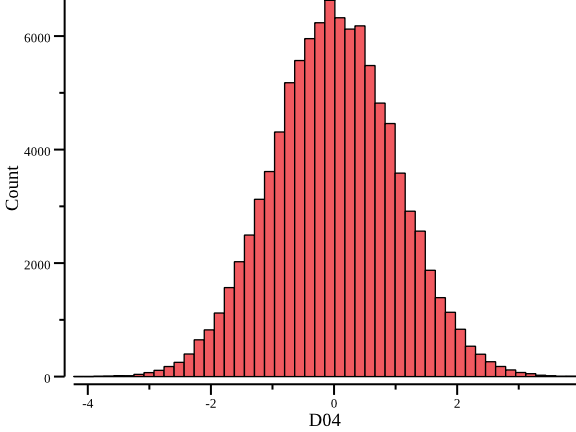

In [207]:
Image('hist.png', width=400)

### Boxplots

In [214]:
!cat ../data/raw/fromPandas.csv \
| csvtk sample -p 0.01 \
| csvtk plot box -g "C00" -f "D04" -o box.png

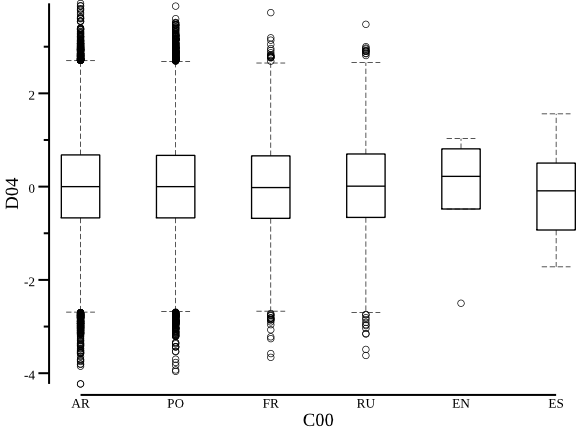

In [215]:
Image('box.png', width=400)

In [212]:
!cat ../data/raw/fromPandas.csv \
| csvtk sample -p 0.01 \
| csvtk plot box -g "C00" -f "D04" --horiz -o box2.png

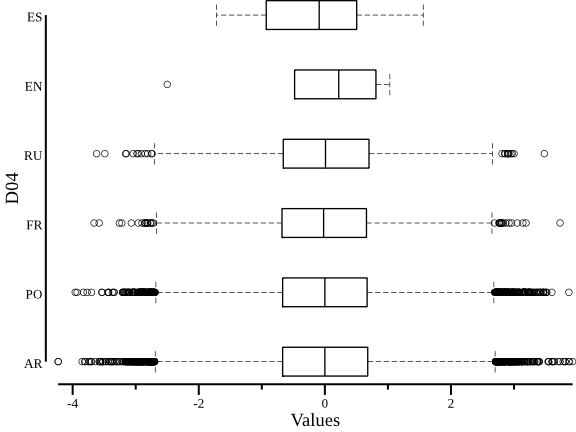

In [213]:
Image('box2.png', width=400)

In [283]:
import pandas as pd
import numpy as np

%pylab inline

df = (pd.DataFrame({'x': range(5000)})
 .assign(Y = lambda df: np.random.randn(5000).round(2))
 .assign(Z = lambda df: 2 * df['x'] + 5)
 .assign(Grp = pd.Series(list('ABCD')).sample(5000, replace=True).values))

df.to_csv('line.csv', index=False)

Populating the interactive namespace from numpy and matplotlib


In [284]:
!csvtk plot line line.csv -x x -y Y -o lineplot.png

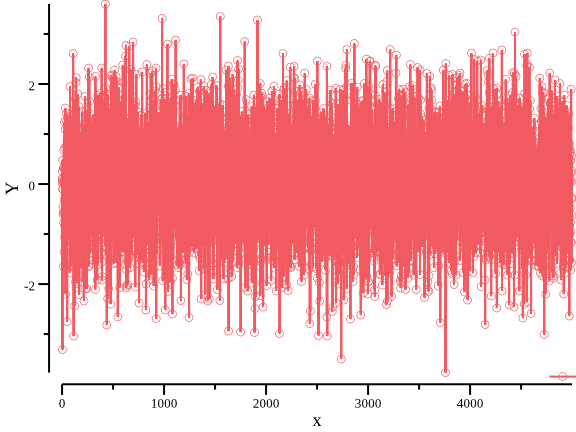

In [285]:
Image('lineplot.png')

### ScatterPlot

In [286]:
!cat line.csv \
| csvtk plot line -x x -y Y -g Grp --scatter -o scatter.png

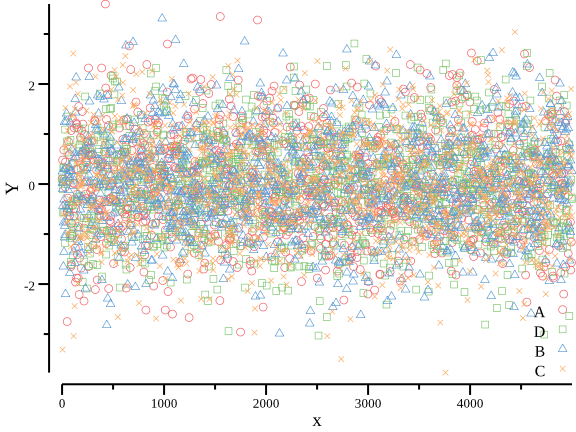

In [287]:
Image('scatter.png', width=400)

---

## `grep`

In [115]:
!csvtk grep -h

grep data by selected fields with patterns/regular expressions

Usage:
  csvtk grep [flags]

Flags:
  -f, --fields string         comma separated key fields, column name or index. e.g. -f 1-3 or -f id,id2 or -F -f "group*" (default "1")
  -F, --fuzzy-fields          using fuzzy fields, e.g. "*name" or "id123*"
  -i, --ignore-case           ignore case
  -v, --invert                invert match
  -n, --no-highlight          no highlight
  -p, --pattern stringSlice   query pattern (multiple values supported)
  -P, --pattern-file string   pattern files (one pattern per line)
  -r, --use-regexp            patterns are regular expression
      --verbose               verbose output

Global Flags:
  -c, --chunk-size int         chunk size of CSV reader (default 50)
  -C, --comment-char string    lines starting with commment-character will be ignored. if your header row starts with '#', please assign "-C" another rare symbol, e.g. '$' (default "#")
  -d, --delimiter string       delimiting ch

In [118]:
!cat ../data/raw/fromPandas.csv | csvtk grep -f C00 -p EN | csvtk head | csvtk pretty -r

C00        D01     C02     D03     D04     A05     A06     B07     A08     C09
 EN   Critical    0.57    1.22   -0.38   -1.53    1.04   -1.03    1.92   -0.88
 EN      Alert    0.68    0.73    0.65    0.57   -1.71    -2.5   -0.12    0.96
 EN      Alert   -0.23    0.13    0.97   -0.22    0.38   -0.28   -0.35   -1.77
 EN   Critical   -1.17    2.36   -2.17   -0.27   -1.04   -1.53    0.59   -0.68
 EN   Critical   -0.56   -0.86   -2.26    0.53    1.52    1.32    0.21    0.93
 EN   Critical   -0.94   -0.45   -0.39     0.5    0.58    0.43    0.28    0.97
 EN      Alert   -3.39    -0.8     1.7    1.85    0.56    1.54    0.43   -0.39
 EN      Alert    -0.8   -0.15    1.39   -0.49   -1.37    1.27   -1.08    0.23
 EN      Alert   -0.09    0.32   -0.56    1.41    1.01   -0.27   -0.84    0.25
 EN      Alert     2.3    0.48   -1.01    0.71   -0.69   -0.92   -1.05   -1.69
cat: write error: Broken pipe


In [ ]:
# Remore rows containing missing data
!csvtk grep -F -f "*" -r -p "^$" -v

---

## `filter`

In [119]:
!csvtk filter -h

filter rows by values of selected fields with artithmetic expression

Usage:
  csvtk filter [flags]

Flags:
      --any             print record if any of the field satisfy the condition
  -f, --filter string   filter condition. e.g. -f "age>12" or -f "1,3<=2" or -F -f "c*!=0"
  -F, --fuzzy-fields    using fuzzy fileds, e.g. "*name" or "id123*"

Global Flags:
  -c, --chunk-size int         chunk size of CSV reader (default 50)
  -C, --comment-char string    lines starting with commment-character will be ignored. if your header row starts with '#', please assign "-C" another rare symbol, e.g. '$' (default "#")
  -d, --delimiter string       delimiting character of the input CSV file (default ",")
  -l, --lazy-quotes            if given, a quote may appear in an unquoted field and a non-doubled quote may appear in a quoted field
  -H, --no-header-row          specifies that the input CSV file does not have header row
  -j, --num-cpus int           number of CPUs to use (default value dep

In [122]:
!cat ../data/raw/fromPandas.csv | csvtk filter -f "D04>3.00" | wc -l

13237


In [128]:
!cat ../data/raw/fromPandas.csv | csvtk filter -F -f "A*>1" | csvtk head | csvtk pretty

C00   D01        C02     D03     D04     A05    A06    B07     A08    C09
PO    Alert      0.76    -1.02   1.43    2.05   1.07   -1.39   2.18   -0.55
AR    Critical   -0.33   0.41    0.89    1.35   1.08   0.56    1.03   0.93
PO    Critical   -1.02   -1.12   -0.22   1.14   1.02   0.53    1.64   -0.6
PO    Critical   -0.4    0.0     -1.66   1.8    1.26   1.53    2.08   0.63
AR    Critical   0.86    -0.15   -1.09   1.93   1.07   0.02    1.95   -0.88
AR    Alert      -0.02   0.84    -0.94   1.19   1.18   0.94    1.2    0.45
AR    Alert      -0.66   1.44    1.21    1.57   1.06   -0.48   1.24   -0.42
AR    Alert      0.46    -2.42   0.1     1.47   1.15   0.08    1.04   -0.61
AR    Alert      -0.09   0.61    -0.29   1.17   1.58   -0.29   1.77   -0.13
AR    Critical   -0.93   -0.31   0.78    1.44   1.14   0.1     1.12   -0.11
cat: write error: Broken pipe


---

## `filter2`

In [129]:
!csvtk filter2 -h

filter rows by awk-like artithmetic/string expressions

The artithmetic/string expression is supported by:

    https://github.com/Knetic/govaluate

Supported operators and types:

    Modifiers: + - / * & | ^ ** % >> <<
    Comparators: > >= < <= == != =~ !~
    Logical ops: || &&
    Numeric constants, as 64-bit floating point (12345.678)
    String constants (single quotes: 'foobar')
    Date constants (single quotes)
    Boolean constants: true false
    Parenthesis to control order of evaluation ( )
    Arrays (anything separated by , within parenthesis: (1, 2, 'foo'))
    Prefixes: ! - ~
    Ternary conditional: ? :
    Null coalescence: ??

Usage:
  csvtk filter2 [flags]

Flags:
  -f, --filter string   awk-like filter condition. e.g. '$age>12' or '$1 > $3' or '$name=="abc"' or '$1 % 2 == 0'

Global Flags:
  -c, --chunk-size int         chunk size of CSV reader (default 50)
  -C, --comment-char string    lines starting with commment-character will be ignored. if your header row s

In [1]:
!cat ../data/raw/fromPandas.csv | csvtk filter2 -f '$A05>1 && $C00=="ES"' | csvtk head | csvtk pretty -r

C00        D01     C02     D03     D04    A05     A06     B07     A08     C09
 ES      Alert    1.09   -0.65   -2.05   1.09    1.32     1.0   -0.15    1.29
 ES   Critical    0.21   -0.89    0.42   1.49   -0.28   -0.65     0.5    0.58
 ES   Critical    2.66   -0.29   -0.56   1.25   -1.66    1.03    0.68    1.25
 ES   Critical    1.59   -0.78   -0.89   1.57    1.08    0.64    0.69   -0.03
 ES      Alert   -1.37    0.77   -0.55   1.67   -0.45   -0.61    1.38    1.16
 ES      Alert   -1.76    0.39   -0.76   2.01    0.57    -0.4    1.34    1.08
 ES   Critical     0.5    0.41    1.05   1.42   -0.92    -0.7   -2.25   -1.23
 ES      Alert    2.28    0.99   -0.45   1.81    1.17   -0.69    0.33   -0.29
 ES   Critical    0.56   -0.03    0.12   1.98    -1.3    0.15    -2.7   -0.02
 ES   Critical    0.31   -1.74    0.09    2.7   -2.32    0.59    1.47    1.53
cat: write error: Broken pipe


---

## `rename`

In [135]:
!csvtk rename -h

rename column names

Usage:
  csvtk rename [flags]

Flags:
  -f, --fields string   select only these fields. e.g -f 1,2 or -f columnA,columnB
  -F, --fuzzy-fields    using fuzzy fileds, e.g. "*name" or "id123*"
  -n, --names string    comma separated new names

Global Flags:
  -c, --chunk-size int         chunk size of CSV reader (default 50)
  -C, --comment-char string    lines starting with commment-character will be ignored. if your header row starts with '#', please assign "-C" another rare symbol, e.g. '$' (default "#")
  -d, --delimiter string       delimiting character of the input CSV file (default ",")
  -l, --lazy-quotes            if given, a quote may appear in an unquoted field and a non-doubled quote may appear in a quoted field
  -H, --no-header-row          specifies that the input CSV file does not have header row
  -j, --num-cpus int           number of CPUs to use (default value depends on your computer) (default 8)
  -D, --out-delimiter string   delimiting character

In [138]:
!cat ../data/raw/fromPandas.csv | csvtk rename -f 1,2 -n Lang,Msg | csvtk head | csvtk pretty -r

Lang        Msg     C02     D03     D04     A05     A06     B07     A08     C09
  PO      Alert    0.08   -0.29    1.04     0.5   -0.19    0.92   -1.18    0.46
  PO      Alert    0.86    1.81    2.28    1.58    0.79    1.19    0.99   -1.17
  PO   Critical   -0.04    0.52   -0.52    0.34    2.09    -0.6    0.85   -1.14
  AR   Critical   -0.28    0.56    0.69    0.62   -0.28   -0.25    0.64   -2.03
  AR   Critical    0.04   -0.38   -0.66   -1.76   -0.13     0.6   -2.06    0.96
  PO   Critical    0.77    1.48    0.16   -0.59    0.94    0.48   -0.32   -0.55
  AR      Alert   -0.15    0.03   -2.05   -0.56   -1.04    1.29    0.51   -0.01
  PO      Alert   -0.17    -0.4   -0.16    2.65   -0.48    0.25    -1.1    0.77
  AR      Alert   -0.57   -0.31   -0.14   -2.89    0.52    0.18   -0.03    0.47
  AR   Critical   -1.09   -0.21    0.65     0.7    0.43   -0.46    0.72   -0.24
cat: write error: Broken pipe


In [139]:
!csvtk rename2 -h

rename column names by regular expression

Usage:
  csvtk rename2 [flags]

Flags:
  -f, --fields string        select only these fields. e.g -f 1,2 or -f columnA,columnB
  -F, --fuzzy-fields         using fuzzy fileds, e.g. "*name" or "id123*"
  -i, --ignore-case          ignore case
  -p, --pattern string       search regular expression
  -r, --replacement string   renamement. supporting capture variables.  e.g. $1 represents the text of the first submatch. ATTENTION: use SINGLE quote NOT double quotes in *nix OS or use the \ escape character.

Global Flags:
  -c, --chunk-size int         chunk size of CSV reader (default 50)
  -C, --comment-char string    lines starting with commment-character will be ignored. if your header row starts with '#', please assign "-C" another rare symbol, e.g. '$' (default "#")
  -d, --delimiter string       delimiting character of the input CSV file (default ",")
  -l, --lazy-quotes            if given, a quote may appear in an unquoted field and a non-

In [164]:
!head -5 ../data/raw/fromPandas.csv \
| csvtk cut -f -2--1 \
| csvtk rename2 -F -f "*" -p "(.*)" -r 'Num_${1}' \
| csvtk pretty -r 

Num_C02   Num_D03   Num_D04   Num_A05   Num_A06   Num_B07   Num_A08   Num_C09
   0.08     -0.29      1.04       0.5     -0.19      0.92     -1.18      0.46
   0.86      1.81      2.28      1.58      0.79      1.19      0.99     -1.17
  -0.04      0.52     -0.52      0.34      2.09      -0.6      0.85     -1.14
  -0.28      0.56      0.69      0.62     -0.28     -0.25      0.64     -2.03


---

## `stats2`

In [1]:
!csvtk stats2 -h

summary of selected digital fields: num, sum, min, max, mean, stdev

Usage:
  csvtk stats2 [flags]

Aliases:
  stats2, stats2


Flags:
  -f, --fields string   select only these fields. e.g -f 1,2 or -f columnA,columnB
  -F, --fuzzy-fields    using fuzzy fields, e.g. "*name" or "id123*"

Global Flags:
  -c, --chunk-size int         chunk size of CSV reader (default 50)
  -C, --comment-char string    lines starting with commment-character will be ignored. if your header row starts with '#', please assign "-C" another rare symbol, e.g. '$' (default "#")
  -d, --delimiter string       delimiting character of the input CSV file (default ",")
  -l, --lazy-quotes            if given, a quote may appear in an unquoted field and a non-doubled quote may appear in a quoted field
  -H, --no-header-row          specifies that the input CSV file does not have header row
  -j, --num-cpus int           number of CPUs to use (default value depends on your computer) (default 8)
  -D, --out-delimiter str

In [7]:
!cat ../data/raw/fromPandas.csv | csvtk stats2 -F -f 'A*'

field          num        sum     min    max   mean   stdev
A05     10,000,000    -236.87   -5.34   5.12      0       1
A06     10,000,000   4,616.29   -5.32   5.38      0       1
A08     10,000,000     876.56   -5.41   5.45      0       1


---

## `mutate`

In [165]:
!csvtk mutate -h

create new column from selected fields by regular expression

Usage:
  csvtk mutate [flags]

Flags:
  -f, --fields string    select only these fields. e.g -f 1,2 or -f columnA,columnB (default "1")
  -i, --ignore-case      ignore case
      --na               for unmatched data, use blank instead of original data
  -n, --name string      new column name
  -p, --pattern string   search regular expression with capture bracket. e.g. (default "^(.+)$")

Global Flags:
  -c, --chunk-size int         chunk size of CSV reader (default 50)
  -C, --comment-char string    lines starting with commment-character will be ignored. if your header row starts with '#', please assign "-C" another rare symbol, e.g. '$' (default "#")
  -d, --delimiter string       delimiting character of the input CSV file (default ",")
  -l, --lazy-quotes            if given, a quote may appear in an unquoted field and a non-doubled quote may appear in a quoted field
  -H, --no-header-row          specifies that the input

In [167]:
!head ../data/raw/fromPandas.csv | csvtk mutate -f C00 -n C00_copy

C00,D01,C02,D03,D04,A05,A06,B07,A08,C09,C00_copy
PO,Alert,0.08,-0.29,1.04,0.5,-0.19,0.92,-1.18,0.46,PO
PO,Alert,0.86,1.81,2.28,1.58,0.79,1.19,0.99,-1.17,PO
PO,Critical,-0.04,0.52,-0.52,0.34,2.09,-0.6,0.85,-1.14,PO
AR,Critical,-0.28,0.56,0.69,0.62,-0.28,-0.25,0.64,-2.03,AR
AR,Critical,0.04,-0.38,-0.66,-1.76,-0.13,0.6,-2.06,0.96,AR
PO,Critical,0.77,1.48,0.16,-0.59,0.94,0.48,-0.32,-0.55,PO
AR,Alert,-0.15,0.03,-2.05,-0.56,-1.04,1.29,0.51,-0.01,AR
PO,Alert,-0.17,-0.4,-0.16,2.65,-0.48,0.25,-1.1,0.77,PO
AR,Alert,-0.57,-0.31,-0.14,-2.89,0.52,0.18,-0.03,0.47,AR


## `sort`

In [2]:
!csvtk sort -h

sort by selected fields

Usage:
  csvtk sort [flags]

Flags:
  -k, --keys stringSlice   keys. sort type supported, "n" for number and "r" for reverse. e.g. "-k 1" or "-k A:r" or ""-k 1:nr -k 2" (default [1])

Global Flags:
  -c, --chunk-size int         chunk size of CSV reader (default 50)
  -C, --comment-char string    lines starting with commment-character will be ignored. if your header row starts with '#', please assign "-C" another rare symbol, e.g. '$' (default "#")
  -d, --delimiter string       delimiting character of the input CSV file (default ",")
  -l, --lazy-quotes            if given, a quote may appear in an unquoted field and a non-doubled quote may appear in a quoted field
  -H, --no-header-row          specifies that the input CSV file does not have header row
  -j, --num-cpus int           number of CPUs to use (default value depends on your computer) (default 8)
  -D, --out-delimiter string   delimiting character of the output CSV file (default ",")
  -o, --out-fil